# Training Deep Neural Networks

**_Experimenting with SELU to Build a self-regularized network and to check it performs better than the network with ReLU._**


In [7]:
# Imports required packages

import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [16]:
# Loads fashion mnist dataset
fashion = fashion_mnist.load_data()

In [63]:
# Considering dataset is organized in tuple, items are referenced as follows
(X_train_full, y_train_full), (X_test, y_test) = fashion

In [65]:
# Each training and test example is assigned to one of the following labels.
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", \
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [67]:
# Splits train dataset further to seperate 5000 instances to be used as validation set

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=5000, random_state=42, stratify=y_train_full)

In [69]:
# Pixel intensities are hence scaled down to range 0 to 1 for all instances
X_train, X_val, X_test = X_train/255.0, X_val/255.0, X_test/255.0

In [71]:
# Standardizes the input data
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)

X_train_scaled = (X_train - pixel_means) / pixel_stds
X_val_scaled = (X_val - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [73]:
# Creates a model with SELU

tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(
        100, activation="selu", kernel_initializer="lecun_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [75]:
# Compiles the model

model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

In [77]:
# Trains the model
history_selu = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_val_scaled, y_val))

Epoch 1/10
1719/1719 [==============================] - 76s 42ms/step - loss: 1.3539 - accuracy: 0.4716 - val_loss: 0.9082 - val_accuracy: 0.6514
Epoch 2/10
1719/1719 [==============================] - 69s 40ms/step - loss: 0.8078 - accuracy: 0.7041 - val_loss: 0.8215 - val_accuracy: 0.6822
Epoch 3/10
1719/1719 [==============================] - 64s 37ms/step - loss: 0.7129 - accuracy: 0.7360 - val_loss: 0.6742 - val_accuracy: 0.7456
Epoch 4/10
1719/1719 [==============================] - 73s 42ms/step - loss: 0.6286 - accuracy: 0.7727 - val_loss: 0.5639 - val_accuracy: 0.7960
Epoch 5/10
1719/1719 [==============================] - 66s 38ms/step - loss: 0.5736 - accuracy: 0.7909 - val_loss: 0.6095 - val_accuracy: 0.7852
Epoch 6/10
1719/1719 [==============================] - 55s 32ms/step - loss: 0.5581 - accuracy: 0.7976 - val_loss: 0.5805 - val_accuracy: 0.7780
Epoch 7/10
1719/1719 [==============================] - 70s 40ms/step - loss: 0.5372 - accuracy: 0.8065 - val_loss: 0.5093 -

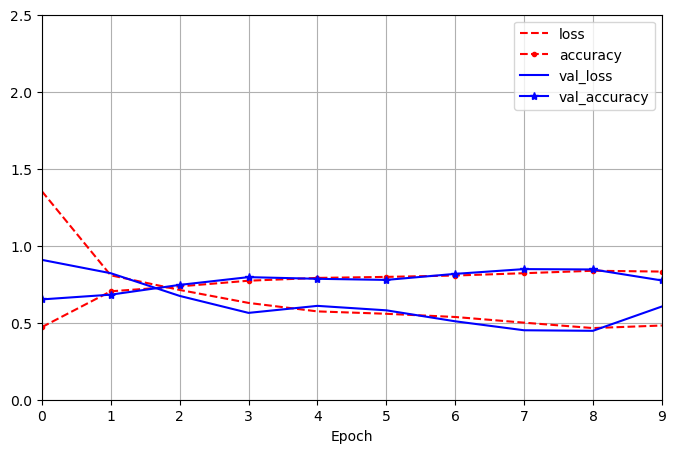

In [105]:
# Plots the learning curve

pd.DataFrame(history_selu.history).plot(
    figsize=(8,5), grid=True, style=["r--", "r--.", "b-", "b-*"], xlabel="Epoch", xlim=[0, 9], ylim=[0.0, 2.5])
plt.show()

Now, let's check the model's learning over ReLU activation function

In [95]:
# Clear keras backend before proceeding with new modeling

tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [97]:
# Creates a same deep dense model, but with ReLU this time

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(100):
    model.add(tf.keras.layers.Dense(
        100, activation="relu", kernel_initializer="he_normal"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# Compiles the model
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

# Trains the model
history_relu = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_val_scaled, y_val))

Epoch 1/10
1719/1719 [==============================] - 72s 40ms/step - loss: 2.1178 - accuracy: 0.1910 - val_loss: 1.9019 - val_accuracy: 0.2646
Epoch 2/10
1719/1719 [==============================] - 59s 34ms/step - loss: 1.4896 - accuracy: 0.3781 - val_loss: 1.1366 - val_accuracy: 0.5306
Epoch 3/10
1719/1719 [==============================] - 70s 41ms/step - loss: 1.0881 - accuracy: 0.5548 - val_loss: 1.0356 - val_accuracy: 0.5750
Epoch 4/10
1719/1719 [==============================] - 61s 36ms/step - loss: 0.9366 - accuracy: 0.6304 - val_loss: 0.8280 - val_accuracy: 0.6886
Epoch 5/10
1719/1719 [==============================] - 65s 38ms/step - loss: 0.8594 - accuracy: 0.6727 - val_loss: 0.9748 - val_accuracy: 0.6048
Epoch 6/10
1719/1719 [==============================] - 58s 34ms/step - loss: 0.8003 - accuracy: 0.7015 - val_loss: 0.6693 - val_accuracy: 0.7648
Epoch 7/10
1719/1719 [==============================] - 60s 35ms/step - loss: 0.7362 - accuracy: 0.7298 - val_loss: 0.5950 -

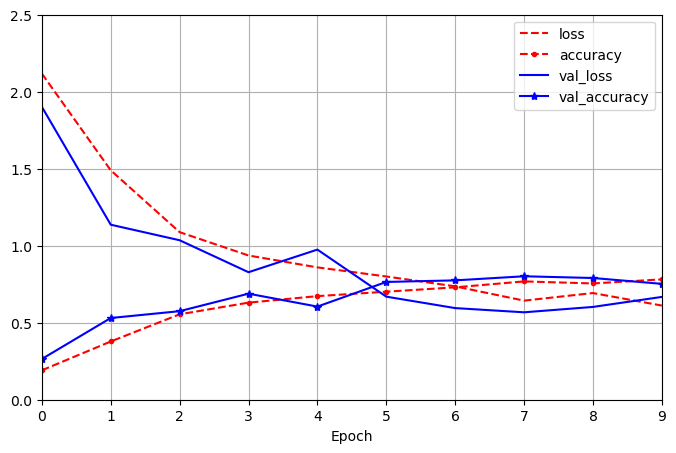

In [103]:
# Plots the learning curve

pd.DataFrame(history_relu.history).plot(
    figsize=(8,5), grid=True, style=["r--", "r--.", "b-", "b-*"], xlabel="Epoch", xlim=[0, 9], ylim=[0.0, 2.5])
plt.show()

**Observation from the above experiment:**

1. Learning during initial epocs for network with SELU was better than that of the network with ReLU.
2. Model with SELU had relative better overall performance (validation accuracy) than the model with ReLU.

In [111]:
# Loads CIFAR10 dataset
# Note that first time download may take several minutes to complete

cifar10 = cifar10.load_data()

170498071/170498071 [==============================] - 1238s 7us/step


In [136]:
# Considering dataset is organized in tuple, items are referenced as follows
(X_train_full, y_train_full), (X_test, y_test) = cifar10

In [146]:
# Each training and test example is assigned to one of the following labels.
class_names = ["airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", \
               "horses", "ships", "trucks"]

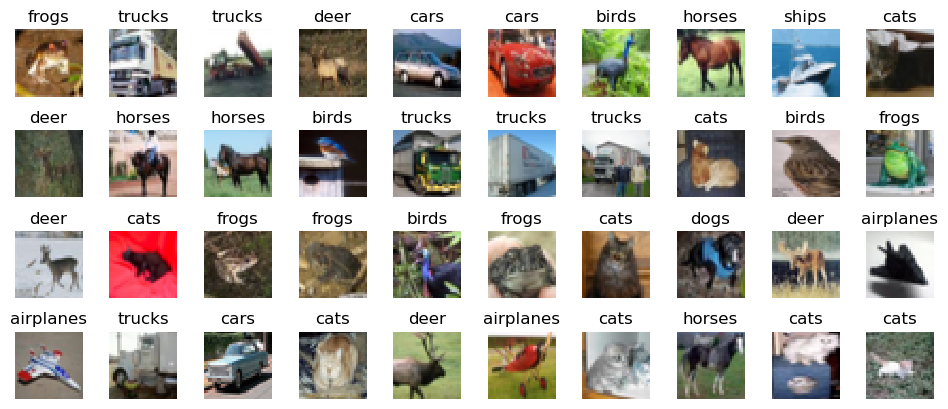

In [162]:
# Visualizes the dataset by plotting few images

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train_full[index], interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train_full[index][0]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

**_Implementing transfer learning over an existing pretrained model to create a new model to accomplish similar task and compare performance._**

## Practical 1

_**Build a neural network of appropriate depth on CIFAR10 dataset with He initialization, Swish activation function, Nadam optimizer and early stopping. Compare this model’s learning curve on its convergence, performance and training time with another model with bath normalization layer added.**_

In [36]:
# Imports required packages

import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from pathlib import Path
from time import strftime
import matplotlib.pyplot as plt

In [9]:
# Loads CIFAR10 dataset
# Note that first time download may take several minutes to complete

cifar10 = cifar10.load_data()

In [10]:
# Considering dataset is organized in tuple, items are referenced as follows
(X_train_full, y_train_full), (X_test, y_test) = cifar10

In [11]:
# Checks the shape of the training and test dataset
print("Shape of the training dataset:", X_train_full.shape)
print("Shape of the test dataset:", X_test.shape)

Shape of the training dataset: (50000, 32, 32, 3)
Shape of the test dataset: (10000, 32, 32, 3)


In [15]:
# Splits train dataset further to seperate 5000 instances to be used as validation set

X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=5000, random_state=42, stratify=y_train_full)

In [16]:
# Each training and test example is assigned to one of the following labels.
class_names = ["airplanes", "cars", "birds", "cats", "deer", "dogs", "frogs", \
               "horses", "ships", "trucks"]

Creates a dense neural network model with specific activation and kernel initializer.

In [20]:
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, activation="swish", kernel_initializer="he_normal"))

2024-08-27 13:39:06.653849: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [53]:
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [55]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-5)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

**Creates callbacks for model checkpoints, early stopping and TensorBoard.**

In [27]:
def get_logdir(logdir="logs"):
    """
    Returns directory path to store all logs into
    """
    return Path(logdir) / strftime("%Y_%m_%d_%H_%M_%S")

In [45]:
logdir = get_logdir()

In [49]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("./model_weights/my_cifar10_model", save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
#run_index = 1 # increment every time you train the model
#run_logdir =  get_logdir() #Path() / "my_cifar10_logs" / f"run_{run_index:03d}"
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)
callbacks = [early_stopping_callback, model_checkpoint_callback, tensorboard_callback]

In [40]:
%load_ext tensorboard
%tensorboard --logdir=./logs

In [57]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/100
1406/1407 [============================>.] - ETA: 0s - loss: 3.5538 - accuracy: 0.1724

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


1407/1407 [==============================] - 60s 39ms/step - loss: 3.5535 - accuracy: 0.1724 - val_loss: 2.1294 - val_accuracy: 0.2256
Epoch 2/100
1407/1407 [==============================] - ETA: 0s - loss: 2.0543 - accuracy: 0.2411

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


1407/1407 [==============================] - 49s 35ms/step - loss: 2.0543 - accuracy: 0.2411 - val_loss: 1.9738 - val_accuracy: 0.2750
Epoch 3/100
1405/1407 [============================>.] - ETA: 0s - loss: 1.9503 - accuracy: 0.2815

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


1407/1407 [==============================] - 49s 35ms/step - loss: 1.9503 - accuracy: 0.2815 - val_loss: 1.9001 - val_accuracy: 0.3036
Epoch 4/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.8683 - accuracy: 0.3165

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


1407/1407 [==============================] - 55s 39ms/step - loss: 1.8683 - accuracy: 0.3166 - val_loss: 1.8604 - val_accuracy: 0.3196
Epoch 5/100
1407/1407 [==============================] - ETA: 0s - loss: 1.8040 - accuracy: 0.3453

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


1407/1407 [==============================] - 53s 38ms/step - loss: 1.8040 - accuracy: 0.3453 - val_loss: 1.8097 - val_accuracy: 0.3458
Epoch 6/100
1407/1407 [==============================] - ETA: 0s - loss: 1.7481 - accuracy: 0.3672

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


1407/1407 [==============================] - 59s 42ms/step - loss: 1.7481 - accuracy: 0.3672 - val_loss: 1.7572 - val_accuracy: 0.3684
Epoch 7/100
1407/1407 [==============================] - 48s 34ms/step - loss: 1.7027 - accuracy: 0.3879 - val_loss: 1.7735 - val_accuracy: 0.3494
Epoch 8/100
1407/1407 [==============================] - ETA: 0s - loss: 1.6681 - accuracy: 0.3982

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


1407/1407 [==============================] - 52s 37ms/step - loss: 1.6681 - accuracy: 0.3982 - val_loss: 1.6646 - val_accuracy: 0.4088
Epoch 9/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.6399 - accuracy: 0.4124

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


1407/1407 [==============================] - 46s 33ms/step - loss: 1.6398 - accuracy: 0.4124 - val_loss: 1.6594 - val_accuracy: 0.4060
Epoch 10/100
1404/1407 [============================>.] - ETA: 0s - loss: 1.6122 - accuracy: 0.4214

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


1407/1407 [==============================] - 39s 28ms/step - loss: 1.6121 - accuracy: 0.4214 - val_loss: 1.6299 - val_accuracy: 0.4184
Epoch 11/100
1407/1407 [==============================] - ETA: 0s - loss: 1.5885 - accuracy: 0.4299

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


1407/1407 [==============================] - 48s 34ms/step - loss: 1.5885 - accuracy: 0.4299 - val_loss: 1.6213 - val_accuracy: 0.4138
Epoch 12/100
1407/1407 [==============================] - ETA: 0s - loss: 1.5638 - accuracy: 0.4405

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


1407/1407 [==============================] - 39s 28ms/step - loss: 1.5638 - accuracy: 0.4405 - val_loss: 1.6054 - val_accuracy: 0.4240
Epoch 13/100
1407/1407 [==============================] - ETA: 0s - loss: 1.5486 - accuracy: 0.4447

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


1407/1407 [==============================] - 46s 33ms/step - loss: 1.5486 - accuracy: 0.4447 - val_loss: 1.5790 - val_accuracy: 0.4296
Epoch 14/100
1407/1407 [==============================] - 41s 29ms/step - loss: 1.5272 - accuracy: 0.4531 - val_loss: 1.5979 - val_accuracy: 0.4248
Epoch 15/100
1407/1407 [==============================] - 40s 29ms/step - loss: 1.5091 - accuracy: 0.4605 - val_loss: 1.5984 - val_accuracy: 0.4278
Epoch 16/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.4949 - accuracy: 0.4662

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


1407/1407 [==============================] - 48s 34ms/step - loss: 1.4950 - accuracy: 0.4662 - val_loss: 1.5751 - val_accuracy: 0.4360
Epoch 17/100
1407/1407 [==============================] - 39s 28ms/step - loss: 1.4800 - accuracy: 0.4703 - val_loss: 1.5934 - val_accuracy: 0.4212
Epoch 18/100
1405/1407 [============================>.] - ETA: 0s - loss: 1.4670 - accuracy: 0.4762

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


1407/1407 [==============================] - 39s 28ms/step - loss: 1.4668 - accuracy: 0.4763 - val_loss: 1.5735 - val_accuracy: 0.4392
Epoch 19/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.4544 - accuracy: 0.4790

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


1407/1407 [==============================] - 44s 31ms/step - loss: 1.4545 - accuracy: 0.4790 - val_loss: 1.5664 - val_accuracy: 0.4496
Epoch 20/100
1407/1407 [==============================] - 46s 33ms/step - loss: 1.4414 - accuracy: 0.4865 - val_loss: 1.5818 - val_accuracy: 0.4354
Epoch 21/100
1407/1407 [==============================] - ETA: 0s - loss: 1.4279 - accuracy: 0.4920

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


1407/1407 [==============================] - 49s 35ms/step - loss: 1.4279 - accuracy: 0.4920 - val_loss: 1.5515 - val_accuracy: 0.4460
Epoch 22/100
1407/1407 [==============================] - 39s 28ms/step - loss: 1.4172 - accuracy: 0.4925 - val_loss: 1.5652 - val_accuracy: 0.4468
Epoch 23/100
1404/1407 [============================>.] - ETA: 0s - loss: 1.4064 - accuracy: 0.4977

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


1407/1407 [==============================] - 42s 30ms/step - loss: 1.4060 - accuracy: 0.4978 - val_loss: 1.5403 - val_accuracy: 0.4456
Epoch 24/100
1405/1407 [============================>.] - ETA: 0s - loss: 1.3975 - accuracy: 0.5002

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


1407/1407 [==============================] - 43s 31ms/step - loss: 1.3974 - accuracy: 0.5002 - val_loss: 1.5276 - val_accuracy: 0.4544
Epoch 25/100
1407/1407 [==============================] - 46s 32ms/step - loss: 1.3862 - accuracy: 0.5036 - val_loss: 1.5320 - val_accuracy: 0.4508
Epoch 26/100
1407/1407 [==============================] - 40s 29ms/step - loss: 1.3745 - accuracy: 0.5103 - val_loss: 1.5471 - val_accuracy: 0.4578
Epoch 27/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.3663 - accuracy: 0.5108

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


1407/1407 [==============================] - 50s 35ms/step - loss: 1.3663 - accuracy: 0.5108 - val_loss: 1.5275 - val_accuracy: 0.4662
Epoch 28/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.3552 - accuracy: 0.5155

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_model/assets


1407/1407 [==============================] - 46s 33ms/step - loss: 1.3552 - accuracy: 0.5155 - val_loss: 1.5023 - val_accuracy: 0.4692
Epoch 29/100
1407/1407 [==============================] - 40s 29ms/step - loss: 1.3459 - accuracy: 0.5173 - val_loss: 1.5215 - val_accuracy: 0.4674
Epoch 30/100
1407/1407 [==============================] - 44s 31ms/step - loss: 1.3350 - accuracy: 0.5238 - val_loss: 1.5346 - val_accuracy: 0.4600
Epoch 31/100
1407/1407 [==============================] - 40s 28ms/step - loss: 1.3278 - accuracy: 0.5248 - val_loss: 1.5167 - val_accuracy: 0.4668
Epoch 32/100
1407/1407 [==============================] - 43s 30ms/step - loss: 1.3188 - accuracy: 0.5287 - val_loss: 1.5455 - val_accuracy: 0.4516
Epoch 33/100
1407/1407 [==============================] - 45s 32ms/step - loss: 1.3091 - accuracy: 0.5317 - val_loss: 1.5499 - val_accuracy: 0.4578
Epoch 34/100
1407/1407 [==============================] - 41s 29ms/step - loss: 1.3024 - accuracy: 0.5351 - val_loss: 1.5146 

In [64]:
model.evaluate(X_val, y_val)

157/157 [==============================] - 1s 6ms/step - loss: 1.5023 - accuracy: 0.4692


[1.5023068189620972, 0.4691999852657318]

**Now, adds batch normalization layer after every Dense layer (and before the activation function), except for the output layer.**

In [67]:
# Resets all the keras states
tf.keras.backend.clear_session()

tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(tf.keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Activation("swish"))
    
model.add(tf.keras.layers.Dense(10, activation="softmax"))

optimizer = tf.keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])


In [69]:
logdir = get_logdir()

In [73]:
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint("./model_weights/my_cifar10_bn_model", save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)
callbacks = [early_stopping_callback, model_checkpoint_callback, tensorboard_callback]

In [77]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - ETA: 0s - loss: 2.0326 - accuracy: 0.2520

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_bn_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_bn_model/assets


1407/1407 [==============================] - 81s 51ms/step - loss: 2.0326 - accuracy: 0.2520 - val_loss: 2.0919 - val_accuracy: 0.2450
Epoch 2/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.7808 - accuracy: 0.3579

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_bn_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_bn_model/assets


1407/1407 [==============================] - 76s 54ms/step - loss: 1.7809 - accuracy: 0.3579 - val_loss: 1.8972 - val_accuracy: 0.3144
Epoch 3/100
1407/1407 [==============================] - 64s 46ms/step - loss: 1.6762 - accuracy: 0.4017 - val_loss: 2.1602 - val_accuracy: 0.2828
Epoch 4/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.6169 - accuracy: 0.4216

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_bn_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_bn_model/assets


1407/1407 [==============================] - 70s 50ms/step - loss: 1.6168 - accuracy: 0.4216 - val_loss: 1.6511 - val_accuracy: 0.4002
Epoch 5/100
1407/1407 [==============================] - 62s 44ms/step - loss: 1.5509 - accuracy: 0.4475 - val_loss: 1.7401 - val_accuracy: 0.3726
Epoch 6/100
1407/1407 [==============================] - 57s 41ms/step - loss: 1.5074 - accuracy: 0.4622 - val_loss: 1.6567 - val_accuracy: 0.4228
Epoch 7/100
1407/1407 [==============================] - ETA: 0s - loss: 1.4615 - accuracy: 0.4838

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_bn_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_bn_model/assets


1407/1407 [==============================] - 65s 46ms/step - loss: 1.4615 - accuracy: 0.4838 - val_loss: 1.5529 - val_accuracy: 0.4598
Epoch 8/100
1407/1407 [==============================] - 59s 42ms/step - loss: 1.4242 - accuracy: 0.4959 - val_loss: 1.6062 - val_accuracy: 0.4242
Epoch 9/100
1407/1407 [==============================] - 60s 43ms/step - loss: 1.3815 - accuracy: 0.5099 - val_loss: 1.5775 - val_accuracy: 0.4436
Epoch 10/100
1407/1407 [==============================] - ETA: 0s - loss: 1.3534 - accuracy: 0.5201

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_bn_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_bn_model/assets


1407/1407 [==============================] - 63s 45ms/step - loss: 1.3534 - accuracy: 0.5201 - val_loss: 1.4841 - val_accuracy: 0.4678
Epoch 11/100
1407/1407 [==============================] - 62s 44ms/step - loss: 1.3270 - accuracy: 0.5308 - val_loss: 1.6689 - val_accuracy: 0.4124
Epoch 12/100
1407/1407 [==============================] - 53s 38ms/step - loss: 1.2989 - accuracy: 0.5409 - val_loss: 1.7644 - val_accuracy: 0.4234
Epoch 13/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.2702 - accuracy: 0.5479

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_bn_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_bn_model/assets


1407/1407 [==============================] - 67s 47ms/step - loss: 1.2702 - accuracy: 0.5478 - val_loss: 1.4416 - val_accuracy: 0.4828
Epoch 14/100
1407/1407 [==============================] - 54s 39ms/step - loss: 1.2465 - accuracy: 0.5568 - val_loss: 1.5086 - val_accuracy: 0.4736
Epoch 15/100
1406/1407 [============================>.] - ETA: 0s - loss: 1.2255 - accuracy: 0.5658

INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_bn_model/assets


INFO:tensorflow:Assets written to: ./model_weights/my_cifar10_bn_model/assets


1407/1407 [==============================] - 64s 45ms/step - loss: 1.2255 - accuracy: 0.5658 - val_loss: 1.4116 - val_accuracy: 0.5010
Epoch 16/100
1407/1407 [==============================] - 57s 40ms/step - loss: 1.1979 - accuracy: 0.5756 - val_loss: 1.5581 - val_accuracy: 0.4842
Epoch 17/100
1407/1407 [==============================] - 56s 40ms/step - loss: 1.1825 - accuracy: 0.5845 - val_loss: 1.5083 - val_accuracy: 0.4832
Epoch 18/100
1407/1407 [==============================] - 57s 40ms/step - loss: 1.1705 - accuracy: 0.5871 - val_loss: 1.5098 - val_accuracy: 0.4804
Epoch 19/100
1407/1407 [==============================] - 60s 42ms/step - loss: 1.1497 - accuracy: 0.5938 - val_loss: 1.4398 - val_accuracy: 0.5080
Epoch 20/100
1407/1407 [==============================] - 56s 40ms/step - loss: 1.1362 - accuracy: 0.5980 - val_loss: 1.4424 - val_accuracy: 0.4988
Epoch 21/100
1407/1407 [==============================] - 55s 39ms/step - loss: 1.1158 - accuracy: 0.6059 - val_loss: 1.4624 

In [82]:
model.evaluate(X_val, y_val)

157/157 [==============================] - 3s 16ms/step - loss: 1.4116 - accuracy: 0.5010


[1.4116411209106445, 0.5009999871253967]

**Observations:**

- The previous model took 27 epochs to reach the lowest validation loss, while the new model achieved that same loss in just 9 epochs and continued to make progress until the 14th epoch. The BN layers stabilized training and allowed us to use a much larger learning rate, so convergence was faster.

- The final model is also much better, with 50.1% validation accuracy instead of 46.91%.

- Although the model converged much faster, each epoch took about 60s instead of 50s, because of the extra computations required by the BN layers. But overall the training time (wall time) to reach the best model was shortened from 28 minutes to 18 minutes.